## Ch. 3 - Q10

In [1]:
import ISLP
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load in data
Carseats = ISLP.load_data("Carseats")
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# Assign design matrix and target vector
X = Carseats[['Price', 'Urban', 'US']].copy()
X[['Urban', 'US']] = X[['Urban', 'US']].apply(lambda col: col.map({'Yes': 1, 'No': 0}))
y = Carseats['Sales']

### Part (a)

In [4]:
model = LinearRegression()
model.fit(X, y)

pd.DataFrame({'Variable': ['Intercept'] + list(X.columns), 
              'Coefficient': [model.intercept_] + list(model.coef_)})

,Variable,Coefficient
0,Intercept,13.043469
1,Price,-0.054459
2,Urban,-0.021916
3,US,1.200573


### Part (b)

*Keep in mind that the units of `Sales` are in thousands.*

* The coefficient for "Price" means that, on average, increasing the price by $1 decreases sales by 54.46 units, assuming all other factors stay the same.

* The coefficient for "Urban" means that, on average, sales in urban locations are 21.92 units lower than in rural locations, keeping all other factors the same.

* The coefficient for "US" means that, on average, sales in US stores are 1,200.57 units higher than in non-US stores, assuming all other factors remain unchanged.

### Part (c)

In [5]:
equation = f"Sales = {model.intercept_:.2f}"
for coef, col in zip(model.coef_, X.columns):
    if coef >= 0: equation += f" + {coef:.2f} * {col}"
    else: equation += f" - {-coef:.2f} * {col}"
print(equation)

Sales = 13.04 - 0.05 * Price - 0.02 * Urban + 1.20 * US


### Part (d)

In [6]:
# Recreating linear model in statsmodels because apparently
#   sci-kit learn doesn't provide p-values :)
X_with_intercept = sm.add_constant(X)
full_model = sm.OLS(y, X_with_intercept).fit()
full_model.pvalues

const    3.626602e-62
Price    1.609917e-22
Urban    9.357389e-01
US       4.860245e-06
dtype: float64

* We can reject the null hypothesis for the variables, `Price` and `US`.

### Part (e)

In [7]:
reduced_X = Carseats[['Price', 'US']].copy()
reduced_X['US'] = reduced_X['US'].map({'Yes': 1, 'No': 0})

reduced_X_with_intercept = sm.add_constant(reduced_X)
reduced_model = sm.OLS(y, reduced_X_with_intercept).fit()

print(f"Full Model - R^2:\t{full_model.rsquared}")
print(f"Reduced Model - R^2:\t{reduced_model.rsquared}")

Full Model - R^2:	0.2392753921840549
Reduced Model - R^2:	0.23926288842678567


### Part (f)

* The two models are nearly identical. Thus the reduced model is likely the preferred option due to it's simplicity

### Part (g)

In [8]:
confidence_intervals = reduced_model.conf_int(alpha=0.05)  # 95% CI
confidence_intervals.columns = ['Lower Bound', 'Upper Bound']
confidence_intervals

,Lower Bound,Upper Bound
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


### Part (h)

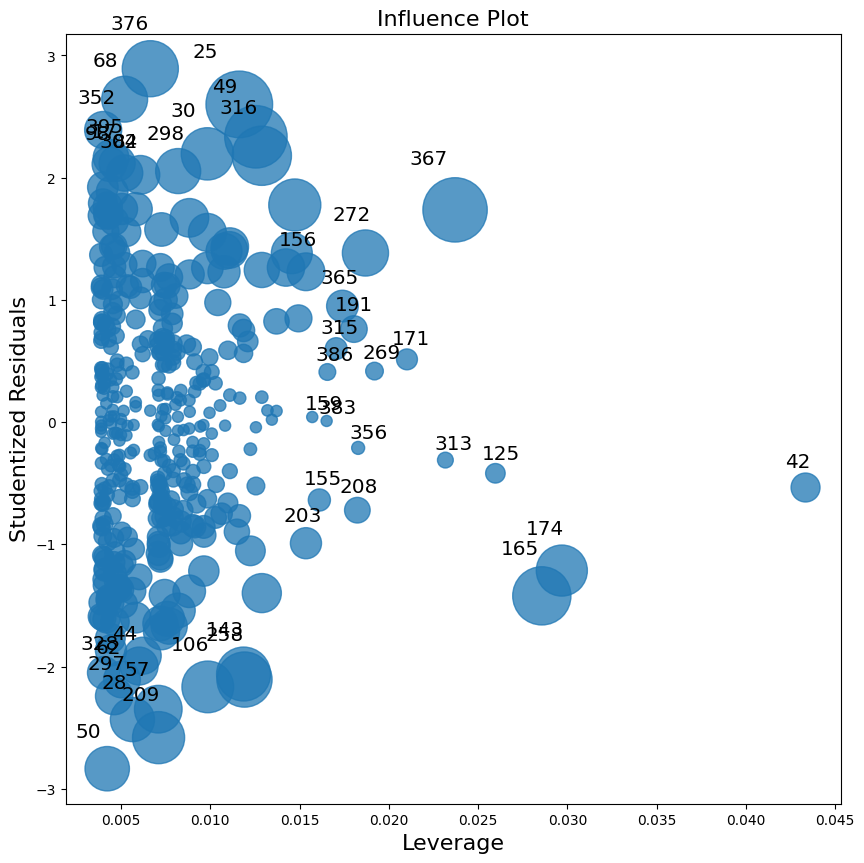

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.graphics.influence_plot(reduced_model, ax=ax)
plt.show()

In [10]:
n, p = reduced_X_with_intercept.shape
print(f"Threshold: {(p) / n}")

Threshold: 0.0075


### Outliers and High Leverage Points  

The plot above shows that there are no outliers as all residuals are within $\pm3$ standard deviations, however some observations come close.  

Additionally, many points have high leverage because their leverage values exceed the threshold $0.0075$, which is calculated as:

$$ \frac{p + 1}{n} = \frac{3}{400} = 0.0075$$

where $p = 2$ is the number of predictors and $n = 400$ is the number of observations. However, likewise, these points are not outliers.

